<h1 style="color:rgb(0,120,170)">Assignment 7: Neural Networks and a Glimpse at Pytorch </h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potentially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Task 1: The XOR Problem</h2>

In this task we try to formalize the fact that a single layer neural network (NN) cannot solve the XOR problem, but a two layer network can. 

Let us assume that we only have four possible inputs $\mathbf{x}_1 = (0,0)$,
$\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$ with the following labels $y_1=0$, $y_2=1$, $y_3=1$, and $y_4=0$, respectively. Note that this exactly describes the XOR function: it outputs 1 (=true) if and only if exactly one of the input components equals 1 (=true).

* **Calculation 1.1**:
    * As a first task show that if we use a linear network
    $
        g_1(\mathbf{x};\mathbf{w})= \mathbf{x} \cdot \mathbf{w} = x^{(1)} w_1 + x^{(2)}  w_2,
    $
     it is impossible to find parameters $w_1$ and $w_2$
      that solve this problem exactly.
* **Calculaton 1.2**:
    * Even by adding bias units or by applying a sigmoid, the problem cannot be solved. 
    However, as soon as we use a two-layer network with a simple non-linear activation function (ReLU):
    
    $$   
    g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}),
    $$
    
    we can find parameters, that solve the problem. 
    * Precisely, show that $\mathbf{W}^{[1]}=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$,
    $\mathbf{b}=\begin{pmatrix} 0 \\ -1 \end{pmatrix}$, and $\mathbf{W}^{[2]}=\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ solve the problem
    in an exact way. The transformation $\max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b})$ has 
    mapped the points $ \mathbf{x}_1,\ldots,  \mathbf{x}_4$ into a space, in which those data points are 
    linearly separable. 

<h3 style="color:rgb(210,90,80)">Calculation 1.1 (10 Points):</h3>

YOUR ANSWER HERE

Claim: A single-layer (linear) neural network cannot learn the XOR function.

We consider

$g_1(\mathbf{x}; \mathbf{w}) \;=\; \mathbf{x}\cdot \mathbf{w} \;=\; x^{(1)} w_1 \;+\; x^{(2)} w_2,$

where $\mathbf{x} = (x^{(1)}, x^{(2)})$. The training points for XOR are:


\begin{aligned}
&\mathbf{x}_1 = (0,0)\quad\rightarrow\quad y_1 = 0,\\
&\mathbf{x}_2 = (1,0)\quad\rightarrow\quad y_2 = 1,\\
&\mathbf{x}_3 = (0,1)\quad\rightarrow\quad y_3 = 1,\\
&\mathbf{x}_4 = (1,1)\quad\rightarrow\quad y_4 = 0.
\end{aligned}


If $g_1(\mathbf{x}; \mathbf{w})$ is to predict these targets, we would need:


\begin{aligned}
g_1(0,0) &= 0 \quad \rightarrow \quad 0\cdot w_1 + 0\cdot w_2 = 0,\\
g_1(1,0) &= 1 \quad \rightarrow \quad 1\cdot w_1 + 0\cdot w_2 = w_1 \approx 1,\\
g_1(0,1) &= 1 \quad \rightarrow \quad 0\cdot w_1 + 1\cdot w_2 = w_2 \approx 1,\\
g_1(1,1) &= 0 \quad \rightarrow \quad 1\cdot w_1 + 1\cdot w_2 = w_1 + w_2 \approx 0.
\end{aligned}


From the first two constraints, we would want $w_1 = 1$. From the third, $w_2 = 1$. However, that would imply for $\mathbf{x}_4$,

$g_1(1,1) \;=\; w_1 + w_2 \;=\; 1 + 1 \;=\; 2$,

which does not produce the target 0. In fact, any choice of linear weights that satisfies the first three points fails on the fourth, and vice versa. Geometrically, XOR is not linearly separable. Therefore, no linear map (no single-layer neural network without nonlinear activation) can solve XOR perfectly.

<h3 style="color:rgb(210,90,80)">Calculation 1.2 (15 Points):</h3>

YOUR ANSWER HERE

Even if we add a bias term and/or apply a single nonlinear activation (like a sigmoid) in one layer, the network still cannot learn XOR. However, a two-layer network with a non-linear activation such as ReLU can solve it.

Consider a two-layer network of the form

$$
g_2(\mathbf{x}; \mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b}) 
= \mathbf{W}^{[2]T}\, \max\bigl(0,\, \mathbf{W}^{[1]}\, \mathbf{x} + \mathbf{b}\bigr),
$$

where $\max(0, \cdot)$ is applied elementwise (i.e., the ReLU). We claim the following choice works perfectly for XOR:

$$
\mathbf{W}^{[1]} = 
\begin{pmatrix} 
1 & 1 \\ 
1 & 1 
\end{pmatrix},
\quad
\mathbf{b} = 
\begin{pmatrix} 
0 \\ 
-1 
\end{pmatrix},
\quad
\mathbf{W}^{[2]} = 
\begin{pmatrix} 
1 \\ 
-2 
\end{pmatrix}.
$$

Check the hidden layer outputs $\max(0, \mathbf{W}^{[1]}\mathbf{x} + \mathbf{b})$ for each $\mathbf{x}_i$:

1. $\mathbf{x}_1 = (0,0)$：

$$
\mathbf{W}^{[1]}\mathbf{x}_1 + \mathbf{b} 
= 
\begin{pmatrix}1 & 1\\ 1 & 1\end{pmatrix}
\begin{pmatrix}0\\0\end{pmatrix}
+ 
\begin{pmatrix}0\\-1\end{pmatrix} 
= 
\begin{pmatrix}0\\-1\end{pmatrix},
$$

$$
\max(0, \cdot) = 
\begin{pmatrix}0\\0\end{pmatrix}.
$$

Then，

$$
g_2(\mathbf{x}_1) 
= \mathbf{W}^{[2]T}\, \begin{pmatrix}0\\0\end{pmatrix} 
= 0,
$$

Matching $y_1=0$.

2. $\mathbf{x}_2 = (1,0)$：

$$
\mathbf{W}^{[1]}\mathbf{x}_2 + \mathbf{b} 
= 
\begin{pmatrix}1 & 1\\ 1 & 1\end{pmatrix}
\begin{pmatrix}1\\0\end{pmatrix}
+ 
\begin{pmatrix}0\\-1\end{pmatrix} 
= 
\begin{pmatrix}1\\0\end{pmatrix},
$$

$$
\max(0, \cdot) = 
\begin{pmatrix}1\\0\end{pmatrix}.
$$

Then，

$$
g_2(\mathbf{x}_2) 
= \mathbf{W}^{[2]T}\, \begin{pmatrix}1\\0\end{pmatrix} 
= 1,
$$

Matching $y_2=1$.

3. $\mathbf{x}_3 = (0,1)$(similar check) yields hidden activation $\max(0,\,(1,-1)^T) = \begin{pmatrix}1\\0\end{pmatrix}$ giving output is 1.

4. $\mathbf{x}_4 = (1,1)$：

$$
\mathbf{W}^{[1]}\mathbf{x}_4 + \mathbf{b} 
= 
\begin{pmatrix}1 & 1\\ 1 & 1\end{pmatrix}
\begin{pmatrix}1\\1\end{pmatrix}
+ 
\begin{pmatrix}0\\-1\end{pmatrix} 
= 
\begin{pmatrix}2\\1\end{pmatrix},
$$

$$
\max(0, \cdot) 
= 
\begin{pmatrix}2\\1\end{pmatrix}.
$$

Then，

$$
g_2(\mathbf{x}_4) 
= 
\begin{pmatrix}1 & -2\end{pmatrix}
\begin{pmatrix}2\\1\end{pmatrix} 
= 2 - 2 = 0,
$$

Matching $y_4=0$.

Hence, this two-layer ReLU network perfectly reproduces XOR.


<h2 style="color:rgb(0,120,170)">Task 2: Backpropagation of a Simple Neural Network</h2>

Consider the following neural network (we try to adapt to the notation from the lecture):
<div>
<img src="attachment:NN_picture_cropped.jpg" width="500"/>
</div>
The preactivations of the hidden units are denoted as $s_3$, $s_4$ and $s_5$  from left to right, their activations as $a_3$, $a_4$ and $a_5$, respectively. In the hidden layer we use ReLU as activation function, i.e. $f_3(x)=f_4(x)=f_5(x)=\text{ReLU}(x)$, and in the output layer the activation is the identity function. The preactivation of the output layer is denoted as $s_6$ and the output as $\hat{y}$. The delta at the output is denoted as $\delta_6$, and the hidden deltas as $\delta_3$, $\delta_4$ and $\delta_5$ from left to right, respectively. The true label is $y=1$ and as loss function we use the mean-squared loss, i.e $L(y,\hat{y})=\frac12 (y-\hat{y})^2$.

* **Calculation 2**:
    * Compute all outputs, preactivations, activations, and delta errors! Also compute $\frac{\partial L}{\partial w_{32}}$. Write down formulas (not only the numerical result) that indicate your computations at least for $s_3$, $\delta_3$ and $\frac{\partial L}{\partial w_{32}}$.

<h3 style="color:rgb(210,90,80)">Calculation 2 (25 Points):</h3>

YOUR ANSWER HERE

We have a network with three hidden units ($s_3$, $s_4$, $s_5$ as preactivations; $a_3$, $a_4$, $a_5$ as activations), all using ReLU, and one output neuron ($s_6$ as preactivation, $\hat{y}$ as the output) using identity activation. The loss is

$$
L(y, \hat{y}) = \frac{1}{2},(y - \hat{y})^2.
$$

We set $y=1$. We want to compute:
	1.	All outputs $s_3$, $s_4$, $s_5$, $a_3$, $a_4$, $a_5$, $s_6$, $\hat{y}$.
	2.	All $\delta$-errors $\delta_3$, $\delta_4$, $\delta_5$, $\delta_6$.
	3.	The partial derivative $\frac{\partial L}{\partial w_{32}}$.

(Note: The precise numeric values depend on the chosen weights and inputs, which are typically given in the problem statement. Below is a schematic outline.)

2.1 Forward Pass (example)
	•	Hidden preactivations:

$$
s_j = w_{j1},x_1 + w_{j2},x_2 + \dots + b_j \quad \text{(for } j=3,4,5\text{)}.
$$
	•	Hidden activations (ReLU):

$$
a_j = \max\bigl(0,; s_j\bigr).
$$
	•	Output preactivation:

$$
s_6 = w_{6,3},a_3 + w_{6,4},a_4 + w_{6,5},a_5 + b_6.
$$
	•	Output (identity activation):

$$
\hat{y} = s_6.
$$

2.2 Backward Pass

Since the loss is

$$
L = \frac{1}{2},(y - \hat{y})^2,
$$

we have:

$$
\delta_6 = \frac{\partial L}{\partial s_6} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial s_6} = (\hat{y} - y) \cdot 1 = \hat{y} - y.
$$

For the hidden units $j=3,4,5$:

$$
\delta_j = \frac{\partial L}{\partial s_j} = \frac{\partial L}{\partial a_j} \cdot \frac{\partial a_j}{\partial s_j}.
$$

But

$$
\frac{\partial L}{\partial a_j} = \frac{\partial L}{\partial s_6} \cdot \frac{\partial s_6}{\partial a_j} = \delta_6, w_{6,j}.
$$

And

$$
\frac{\partial a_j}{\partial s_j} =
\begin{cases}
1, & \text{if } s_j > 0, \
0, & \text{if } s_j \le 0.
\end{cases}
$$

(That is the derivative of ReLU at $s_j$.)

Hence,

$$
\delta_j = \delta_6, w_{6,j} \times
\begin{cases}
1, & s_j > 0, \
0, & s_j \le 0.
\end{cases}
$$

2.3 Partial derivatives (example)

For instance,

$$
\frac{\partial L}{\partial w_{32}} = \frac{\partial L}{\partial s_3},\frac{\partial s_3}{\partial w_{32}} = \delta_3 ,\frac{\partial}{\partial w_{32}} \bigl( w_{31} x_1 + w_{32} x_2 + b_3 \bigr).
$$

Since

$$
\frac{\partial}{\partial w_{32}} \left(w_{31} x_1 + w_{32} x_2 + b_3 \right) = x_2,
$$

it follows

$$
\frac{\partial L}{\partial w_{32}} = \delta_3 ,x_2.
$$

<h2 style="color:rgb(0,120,170)">Task 3: Pytorch and a Visualization of the Vanishing Gradient Problem</h2>

The aim of this task is to provide you with some familiarity with Pytorch, a Python-package which is nowadays heavily used for tasks that involve computations with neural networks. It has the nice feature that it incorporates automatic differentiation, so that you don't have to implement the backward pass for a NN any more. It also allows for transferring more involved experiments to GPUs easily, however, we won't need this nice feature here. We will again work with the Fashion MNIST data set, but this time we provide you with a Pytorch routine that can download it for you and even transforms it appropriately.

* **Code 3.1**:
    * Your first task is probably the easiest of the whole course as you just have to let the code run and plot some images. However, to this end you will need to install [PyTorch](https://pytorch.org/get-started/locally/) appropriately in your environment!
* **Code 3.2**:
    * Firstly, implement your first Artificial Neural Network (ANN) in this class. You will use a 3-hidden-layer NN with sigmoid activation here. As you should know from the lecture, sigmoid is not a very good choice as it induces vanishing gradients.
    * To overcome this issue, create a second nework class in a similar way that again has the same three linear layers but instead uses the ReLU activation function which is known to prevent the gradients from vanishing.
* **Code 3.2**:
    * Now, use the provided functions `train` and `test` to train and test both of your networks. Afterwards, plot the returned gradient magnitudes!
    * For this task, implement the function `train_and_test` that takes a given model and a hyperparameter dictionary and completes the aforementioned tasks. For the optimizer, you can use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) and have a look at the `hyperparams` defined below
* **Question 3.3**:
    * Answer some questions about your results!  

<h3 style="color:rgb(208,90,80)">Code 3.1 (10 Points)</h3>

In [21]:
# Nothing to do here, just run the cell.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

In [22]:
# Here we collect the hyperparameters we are going to use (you can train for more epochs etc in case you want to).
hyperparams = dict(batch_size=64, test_batch_size=1000, epochs=1, lr=0.01, momentum=0.5, seed=66)
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()
device = torch.device('cuda' if use_cuda else 'mps' if use_mps else 'cpu')
print(f"Hyperparameters: {hyperparams}")
print(f"Device: {device}")

Hyperparameters: {'batch_size': 64, 'test_batch_size': 1000, 'epochs': 1, 'lr': 0.01, 'momentum': 0.5, 'seed': 66}
Device: mps


In [23]:
# Nothing to do here, just run the cell.
# Data loader (downloads data automatically the first time).
# 0.1307 and 0.3081 are the mean and the std computed on the training set.
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = DataLoader(
    datasets.FashionMNIST(
        os.path.join('.', 'data'),
        train=True, download=True,
        transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=hyperparams["batch_size"],
    shuffle=True,
    **kwargs
)
test_loader = DataLoader(
    datasets.FashionMNIST(
        os.path.join('.', 'data'),
        train=False,
        transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
        batch_size=hyperparams["test_batch_size"],
    shuffle=False,
    **kwargs
)

torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


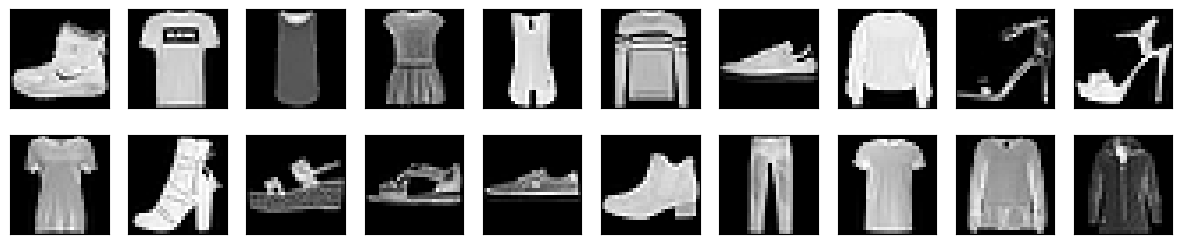

In [24]:
# Nothing to do here, just run the cell.
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

<h3 style="color:rgb(208,90,80)">Code 3.2 (10 Points)</h3>

Implement the `ANN_sigmoid` class that inherits from `nn.Module` according to the following table (if you have never built a NN using PyTorch, this might give you some help: [Building Models with PyTorch](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)):

| **Position** | **Element**          | **Comment**                        |
|--------------|----------------------|-------------------------------------|
| 0            | input               | Flatten the input to the size of `d_in`|
| 1            | fully connected     | $512$ output features               |
| 2            | sigmoid                | -                                   |
| 3            | fully connected     | $1024$ output features               |
| 4            | sigmoid                | -                                   |
| 5            | fully connected     | $512$ output features               |
| 6            | sigmoid                | -                                   |
| 7            | fully connected     | `d_out` output features                |

Implement the `ANN_relu` similar to `ANN_sigmoid` but with the ReLU activation function between linear layers:

| **Position** | **Element**          | **Comment**                        |
|--------------|----------------------|-------------------------------------|
| 0            | input               | Flatten the input to the size of `d_in`|
| 1            | fully connected     | $512$ output features               |
| 2            | relu                | -                                   |
| 3            | fully connected     | $1024$ output features               |
| 4            | relu                | -                                   |
| 5            | fully connected     | $512$ output features               |
| 6            | relu                | -                                   |
| 7            | fully connected     | `d_out` output features                |

In [25]:
class ANN_sigmoid(nn.Module):
    def __init__(self, d_in, d_out):
        # YOUR CODE HERE
        super().__init__()
        # 4 linear layers
        self.linear1 = nn.Linear(d_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, d_out)

    def forward(self, x):
        # YOUR CODE HERE
        # Flatten the input to [batch_size, d_in]
        x = x.view(x.size(0), -1)
        # Forward pass with Sigmoid activations
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        x = self.linear4(x)  # final layer has no sigmoid in table specification
        return x

In [26]:
# DO NOT DELETE OR EDIT THIS CELL!
d_in = 784
d_out = 10

torch.manual_seed(hyperparams["seed"])

test_model = ANN_sigmoid(d_in, d_out)
assert isinstance(test_model, nn.Module), "Your model does not inherit from nn.Module!"
linear_layers = [layer for layer in test_model.modules() if isinstance(layer, nn.Linear)]
assert len(linear_layers) == 4, "Wrong number of linear layers!"
expected_dims = [
        (d_in, 512),  
        (512, 1024), 
        (1024, 512), 
        (512, d_out)
    ]
for linear_layer, (expected_in, expected_out) in zip(linear_layers, expected_dims):
    assert linear_layer.in_features == expected_in, f"Expected in_features={expected_in}, got {linear_layer.in_features}!"
    assert linear_layer.out_features == expected_out, f"Expected out_features={expected_out}, got {linear_layer.out_features}!"

data, _ = next(iter(test_loader))
torch.testing.assert_close(test_model(data[:2]), torch.tensor([[0.3537, 0.5558, 0.1939, -0.0044, 0.0700, -0.0687, 0.2242, -0.4975, 0.0686, -0.2119], [0.3567,  0.5539, 0.1965, -0.0021, 0.0705, -0.0674, 0.2192, -0.5005, 0.0655, -0.2142]]), atol=1e-4, rtol=1e-4)

In [27]:
class ANN_relu(nn.Module):
    def __init__(self, d_in, d_out):
        # YOUR CODE HERE
        super().__init__()
        # 4 linear layers
        self.linear1 = nn.Linear(d_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, d_out)

    def forward(self, x):
        # YOUR CODE HERE
        # Flatten the input
        x = x.view(x.size(0), -1)
        # Forward pass with ReLU activations
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)  # final layer has no ReLU in table specification
        return x

In [28]:
# DO NOT DELETE OR EDIT THIS CELL!
d_in = 784
d_out = 10

torch.manual_seed(hyperparams["seed"])

test_model = ANN_relu(d_in, d_out)
assert isinstance(test_model, nn.Module), "Your model does not inherit from nn.Module!"
linear_layers = [layer for layer in test_model.modules() if isinstance(layer, nn.Linear)]
assert len(linear_layers) == 4, "Wrong number of linear layers!"
expected_dims = [
        (d_in, 512),  
        (512, 1024), 
        (1024, 512), 
        (512, d_out)
    ]
for linear_layer, (expected_in, expected_out) in zip(linear_layers, expected_dims):
    assert linear_layer.in_features == expected_in, f"Expected in_features={expected_in}, got {linear_layer.in_features}!"
    assert linear_layer.out_features == expected_out, f"Expected out_features={expected_out}, got {linear_layer.out_features}!"

data, _ = next(iter(test_loader))
torch.testing.assert_close(test_model(data[:2]), torch.tensor([[0.0143, 0.0178, 0.0555, -0.0060, 0.0667, 0.0119, 0.0641, -0.0007, -0.0232, -0.0485], [0.0806, 0.0433, 0.0496, -0.0265, 0.0924, 0.0328, 0.0222, -0.0572, -0.1343, -0.0696]]), atol=1e-4, rtol=1e-4)

Next, we provide you with a routine for training a neural network with Pytorch. For each layer, it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command `loss.backward()` automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [29]:
# Nothing to do here, just run the cell.
def train(model: nn.Module, train_loader: DataLoader, optimizer: optim.Optimizer, epoch: int) -> tuple[list, list, list]:
    """Train a model for a specific epoch on a given training dataloader.

    Parameters
    ----------
    model : nn.Module
        The neural network model to be trained.
    train_loader : DataLoader
        DataLoader providing the training dataset.
    optimizer : optim.Optimizer
        Optimizer used for updating model parameters.
    epoch : int
        The current epoch number, used for logging purposes.

    Returns
    -------
    tuple[list, list, list]
        A tuple containing three lists:
        - grads1_list: List of average absolute gradients for `linear1` weights across batches.
        - grads2_list: List of average absolute gradients for `linear2` weights across batches.
        - grads3_list: List of average absolute gradients for `linear3` weights across batches.
    """
    device = next(model.parameters()).device
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads = []
        for layer in model.modules():
            if isinstance(layer, nn.Linear):
                abs_grads = abs(layer.weight.grad)
                grads.append(torch.mean(abs_grads).item())

        grads1_list.append(grads[0])
        grads2_list.append(grads[1])
        grads3_list.append(grads[2])
        
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        
    print('\nTraining set: Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset)))
    
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [30]:
# Nothing to do here, just run the cell.
def test(model, test_loader):
    """Evaluate a trained model on a test dataset.

    Parameters
    ----------
    model : nn.Module
        The trained neural network model to evaluate.
    test_loader : DataLoader
        DataLoader providing the test dataset.
    """
    device = next(model.parameters()).device
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

<h3 style="color:rgb(208,90,80)">Code 3.2 (20 Points)</h3>

In [31]:
def train_and_test(model: nn.Module, hyperparameters: dict):
    """Train and evaluate a model using the specified hyperparameters.

    Parameters
    ----------
    model : nn.Module
        The neural network model to be trained and tested.
    hyperparameters : dict
        A dictionary containing hyperparameters for training, including:
        - "lr" : float
            The learning rate for the optimizer.
        - "momentum" : float
            The momentum factor for the optimizer.
        - "epochs" : int
            The number of epochs to train the model.
    """
    # YOUR CODE HERE
    optimizer = optim.SGD(
        model.parameters(),
        lr=hyperparameters["lr"],
        momentum=hyperparameters["momentum"]
    )
    all_grads1 = []
    all_grads2 = []
    all_grads3 = []
    
    for epoch in range(hyperparameters["epochs"]):
        grads1_list, grads2_list, grads3_list = train(model, train_loader, optimizer, epoch)
        test(model, test_loader)
        
        # We'll store only the last epoch's grad-lists for plotting 
        # (or you could accumulate for all epochs if desired)
        all_grads1 = grads1_list
        all_grads2 = grads2_list
        all_grads3 = grads3_list

    # Plot the average absolute gradients from the last epoch
    plt.figure(figsize=(10,5))
    plt.plot(all_grads1, label="Layer1 Grad", color="red")
    plt.plot(all_grads2, label="Layer2 Grad", color="blue")
    plt.plot(all_grads3, label="Layer3 Grad", color="green")
    plt.title("Mean Absolute Gradients per mini-batch (Last Epoch)")
    plt.xlabel("Mini-batch index")
    plt.ylabel("Mean |grad|")
    plt.legend()
    plt.show()

<<< Sigmoid >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.344073
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.305196
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.294432
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.312001
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.301917
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.289095
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.310439
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.306238
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.288915
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.284819

Training set: Accuracy: 6560/60000 (10.93%)


Test set: Average loss: 2.2985, Accuracy: 1681/10000 (16.81%)



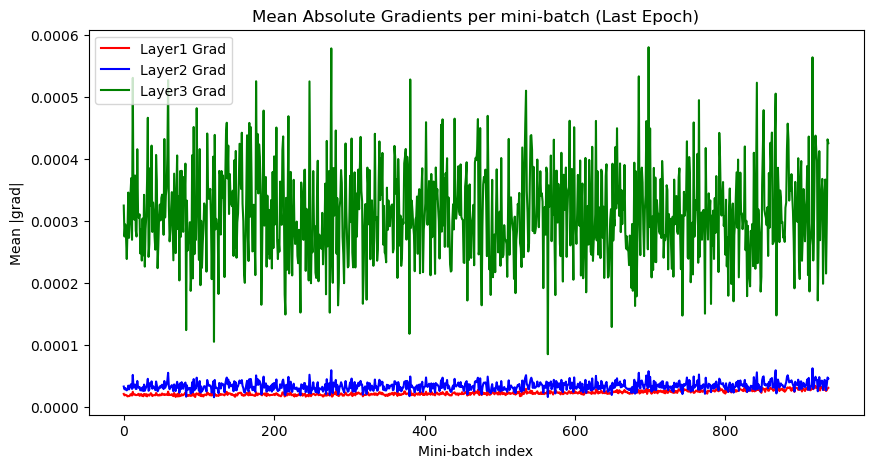

In [32]:
# Nothing to do here, just run the cell.
print("<<< Sigmoid >>>\n")
model = ANN_sigmoid(input_dim, output_dim).to(device)
train_and_test(model, hyperparams)

<<< ReLU >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.319267
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.350619
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.877109
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.687577
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.601092
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.704951
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.666375
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.588542
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.452010
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.435318

Training set: Accuracy: 44507/60000 (74.18%)


Test set: Average loss: 0.5091, Accuracy: 8197/10000 (81.97%)



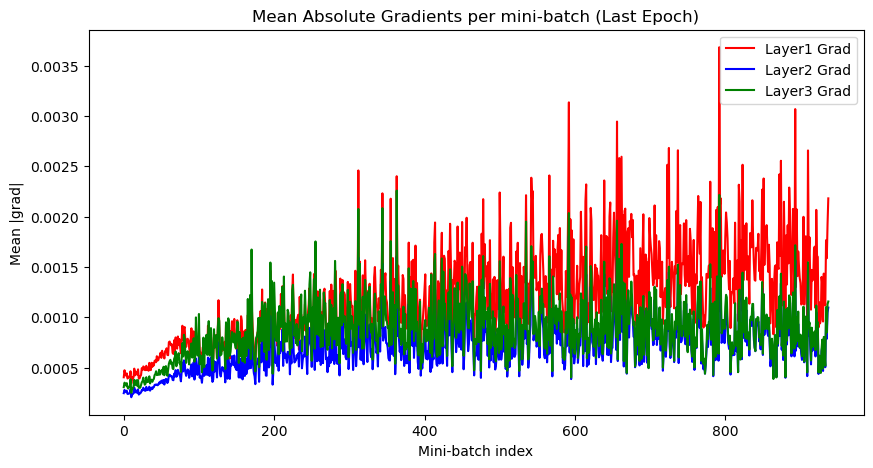

In [33]:
# Nothing to do here, just run the cell.
print("<<< ReLU >>>\n")
model = ANN_relu(input_dim, output_dim).to(device)
train_and_test(model, hyperparams)

<h3 style="color:rgb(210,90,80)">Question 3.3 (10 Points):</h3>

Q: What observations for the Sigmoid network and the ReLU network can you make?

a_)  The sigmoid network achieves a poor performance in only one epoch. <br>
b_)  The means of magnitudes of the gradients for the sigmoid network are significantly higher for lower layers. This is an indication of the vanishing gradient problem. <br>
c_)  One reason why the sigmoid network can lead to vanishing gradients might be that the derivative of the sigmoid does not exceed 1/4. <br>
d_)  When you use the ReLU activation function, the resulting network achieves a much better performance compared to the sigmoid model in only one epoch. <br>
e_) One reason why several well-known activation functions different from sigmoid can lead to more stable training can be the fact that their derivatives are always larger than 1.

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a_)** is correct, define a variable `a_` and set it to `True`, the same applies to **b_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [34]:
# YOUR CODE HERE
a_ = True
b_ = False
c_ = True
d_ = True
e_ = False

In [35]:
# DO NOT DELETE THIS CELL!
assert a_ is not None, "Store True/False!"
assert a_ in [True, False], "Invalid Answer!"

In [36]:
# DO NOT DELETE THIS CELL!
assert b_ is not None, "Store True/False!"
assert b_ in [True, False], "Invalid Answer!"

In [37]:
# DO NOT DELETE THIS CELL!
assert c_ is not None, "Store True/False!"
assert c_ in [True, False], "Invalid Answer!"

In [38]:
# DO NOT DELETE THIS CELL!
assert d_ is not None, "Store True/False!"
assert d_ in [True, False], "Invalid Answer!"

In [39]:
# DO NOT DELETE THIS CELL!
assert e_ is not None, "Store True/False!"
assert e_ in [True, False], "Invalid Answer!"